# Chap01 - 신경망 복습

## 1.1 수학과 파이썬 복습

### 1.1.2 행렬의 원소별 연산

In [1]:
import numpy as np

In [2]:
W = np.array([[1, 2, 3], 
              [4, 5, 6]])
X = np.array([[0, 1, 2], 
              [3, 4, 5]])

In [3]:
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [4]:
# element-wise(point-wise)
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

### 1.1.3 브로드캐스트 (Broadcast)

- https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html

In [5]:
A = np.array([[1, 2], 
              [3, 4]])

A * 10

array([[10, 20],
       [30, 40]])

$$
\begin{bmatrix}
1 & 2 \\ 3 & 4
\end{bmatrix}
*
\begin{bmatrix}
10 & 20
\end{bmatrix}
= 
\begin{bmatrix}
1 & 2 \\ 3 & 4
\end{bmatrix}
*
\begin{bmatrix}
10 & 20 \\ 10 & 20
\end{bmatrix}
=
\begin{bmatrix}
10 & 40 \\ 30 & 80
\end{bmatrix}
$$

In [7]:
A = np.array([[1, 2], 
              [3, 4]])
b = np.array([10, 20])

A * b

array([[10, 40],
       [30, 80]])

### 1.1.4 벡터의 내적과 행렬의 곱

- $\mathbf{x} = (x_1, \dots, x_n)$, $\mathbf{y} = (y_1, \dots, y_n)$ 에 대하여, 백터의 내적은 두 벡터에서 대응하는 원소들의 곱을 모두 더한 것

$$
\mathbf{x} \cdot \mathbf{y} = \mathbf{x}^{T} \mathbf{y} = x_1y_1 + x_2y_2 + \cdots + x_ny_n
$$


> 벡터의 내적은 직관적으로 '두 벡터가 얼마나 같은 방향을 향하고 있는가'를 나타낸다. 벡터의 길이가 1이라고 가정하고, 두 벡터가 완전히 같은 방향이면 두 벡터의 내적은 1이 된다.

In [10]:
# 벡터의 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

np.dot(a, b)

32

In [11]:
# 행렬의 곱
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])

np.matmul(A, B)

array([[19, 22],
       [43, 50]])

In [12]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

> https://github.com/rougier/numpy-100

## 1.2 신경망의 추론

### 1.2.1 신경망 추론의 전체 그림

In [13]:
# Inpur -> hidden
W1 = np.random.randn(2, 4)  # 가중치
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.matmul(x, W1) + b1  # b1 은 브로드캐스팅 됨

In [14]:
h

array([[-3.33462594,  1.83375388,  1.36724767, -0.78160224],
       [-3.31796424,  1.07546246,  0.98015921, -0.49495683],
       [-4.18341648,  1.1503361 ,  0.95845804, -0.80703702],
       [-2.72641124,  0.01163217,  0.47651541,  0.09384387],
       [-3.51206655,  1.12462725,  0.99186665, -0.57695321],
       [-3.22412013,  0.76790655,  0.82920093, -0.35008666],
       [-2.71258202, -0.89403187,  0.01377586,  0.43420399],
       [-3.68717149,  1.61922506,  1.2329531 , -0.81787355],
       [-3.10348124,  2.41349991,  1.68011143, -0.9206346 ],
       [-3.31372714,  1.33131827,  1.111451  , -0.58843528]])

- 비선형 변환 : 시그모이드 함수(sigmoid function)

$$
\sigma(x) = \frac{1}{1 + \exp{(-x)}}
$$

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
a = sigmoid(h)  # 활성화(activation)

a

array([[0.03440223, 0.86220831, 0.79693511, 0.31397467],
       [0.03496003, 0.74563434, 0.72713981, 0.37872656],
       [0.01501737, 0.7595723 , 0.72281297, 0.30852225],
       [0.06143276, 0.50290801, 0.6169247 , 0.52344376],
       [0.02897084, 0.75484601, 0.72945646, 0.35963396],
       [0.03826806, 0.68306787, 0.69618594, 0.41336141],
       [0.06223499, 0.29027849, 0.50344391, 0.60687709],
       [0.02443092, 0.83468823, 0.77433502, 0.30621523],
       [0.04296389, 0.91785096, 0.84291929, 0.28482861],
       [0.03510326, 0.79105861, 0.75239952, 0.35699395]])

In [17]:
a.shape

(10, 4)

In [18]:
# hidden -> output
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

s = np.matmul(a, W2) + b2  # score 값

In [19]:
s

array([[-2.66883962e-01,  9.38922574e-02,  1.10333791e+00],
       [-8.67869189e-02,  2.39539933e-01,  9.92154210e-01],
       [-1.03642770e-01,  1.76227184e-01,  1.03129749e+00],
       [ 2.36378452e-01,  5.47614350e-01,  8.13989934e-01],
       [-9.82273246e-02,  2.17445018e-01,  1.00641342e+00],
       [ 1.05545234e-03,  3.16776467e-01,  9.44196857e-01],
       [ 5.38248858e-01,  7.85386036e-01,  6.62533868e-01],
       [-2.18709051e-01,  1.10956765e-01,  1.08457452e+00],
       [-3.72002672e-01,  2.47587644e-02,  1.17703439e+00],
       [-1.54103014e-01,  1.85832801e-01,  1.02917877e+00]])

### 1.2.2 계층으로 클래스화 및 순전파 구현 

- 완전연결계층(fully connected layer)에 의한 변환은 기하학에서의 아핀(Affine) 변환에 해당

In [30]:
import numpy as np

# 시그모이드(Sigmoid) 레이어 구현
class Sigmoid:
    '''Sigmoid Layer class
    
    Sigmoid layer에는 학습하는 params가 따로 없으므로 
    인스턴스 변수인 params는 빈 리스트로 초기화
    
    '''
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        """순전파(forward propagation) 메서드
        Args:
            x(ndarray): 입력으로 들어오는 값
        Returns:
            Sigmoid 활성화 값
        """
        return 1 / (1 + np.exp(-x))

In [31]:
# 완전연결계층(Affine) 구현
class Affine:
    '''FC layer'''
    def __init__(self, W, b):
        """
        Args: 
            W(ndarray): 가중치(weight)
            b(ndarray): 편향(bias)
        """
        self.params = [W, b]
        
    def forward(self, x):
        """순전파(forward propagation) 메서드
        Args:
            x(ndarray): 입력으로 들어오는 값
        Returns:
            out(ndarray): Wx + b
        """
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

<img src="./images/basic_nn.png" width="70%" height="70%" />

In [35]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        # input -> hidden
        W1 = np.random.randn(I, H)  
        b1 = np.random.randn(H)
         # hidden -> output
        W2 = np.random.randn(H, O) 
        b2 = np.random.randn(O)
        
        # 레이어 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # 모든 가중치를 리스트에 모은다.
        self.parmas = [layer.params for layer in self.layers]
        # self.params = []
        # for layer in self.layers:
        #     self.params += layer.params
        
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [36]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

In [34]:
s

array([[-2.37208419, -1.2272713 , -0.71600047],
       [-1.99217296, -1.11038922, -1.17477847],
       [-2.4097767 , -0.97492006, -1.02192888],
       [-2.11839519, -1.48960661, -0.51950315],
       [-2.18613271, -0.8669607 , -1.35818199],
       [-2.49563619, -0.91864415, -1.03032285],
       [-2.92241833, -1.28789096, -0.19786216],
       [-2.57245646, -0.69173756, -1.35170837],
       [-2.26468526, -0.77741298, -1.44616699],
       [-2.81967667, -0.84530049, -0.87213041]])

In [37]:
s

array([[-0.3557911 , -0.66037635, -0.3281263 ],
       [ 0.22745096, -0.14754727, -0.20193402],
       [ 0.42144866, -0.37246175, -0.43626679],
       [-0.49126246, -0.50797159, -0.20269287],
       [ 0.10785604, -0.58505229, -0.47976242],
       [-0.22429006, -0.41612883, -0.23535545],
       [-0.13092219, -0.60470566, -0.42340892],
       [ 0.65300882, -0.42005398, -0.51794339],
       [-0.29888822, -0.24882564, -0.11788807],
       [-0.31995078, -0.68040913, -0.3912852 ]])

## 1.3 신경망의 학습

### 1.3.1 손실 함수(Loss Function)

- 신경망의 성능을 나타내는 척도로 손실(loss)을 사용

- 신경망의 손실은 손실 함수를 사용해 구함 

- 다중 클래스 분류(multi-class classification)의 경우 **교차 엔트로피 오차**(CEE, Cross Entropy Error)를 사용


- Softmax 함수의 식은 다음과 같다. 
    - 즉 class가 $n$개 일 때, $k$ 번째 클래스의 확률 $y_k$ 를 구하는 식

$$
y_{k} = \frac{\exp{(s_k)}}{\sum_{i=1}^{n}{\exp{(S_i)}}}
$$


- Cross Entropy 식은 다음과 같다.
     - $t_k$는 $k$번째 클래스에 해당하는 정답 레이블
     - $\log$는 밑을 $e$로 하는 로그
     - 정답 레이블 $t_k$는 원-핫 벡터이기 때문에, 실질적으로 $1$에만 해당하는 인덱스만 계산 된다.

$$
\begin{align*}
L &- -\sum_{k}{\left[ t_k \log{y_k} + (1-t_k) \log{(1-y_k)}\right]} \\ 
&= - \sum_{k}{t_k \log{y_k}}
\end{align*}
$$

#### Softmax with Loss 레이어 

- 해당 교재에서는 소프트맥스 함수와 교차 엔트로피 오차를 계산하는 레이어인 `SoftmaxWithLoss` 클래스를 구현하여 사용한다.

- [밑바닥 부터 시작하는 딥러닝-1]의 5.6.3 에서 확인할 수 있다.

- `common/layer.py`에서 `SoftmaxWithLoss` 클래스를 확인할 수 있다.

![](./images/softmaxwitloss.png)

### 1.3.2 미분과 기울기

예를 들어, $L$은 스칼라, $x$는 벡터인 함수

$$
L = f(x)
$$

에 대해 벡터의 각 원소에 대한 미분을 계산한 것이 **기울기**(gradient)이다.

$$
\frac{\partial L}{\partial \mathbf{x}} = \left[ \frac{\partial L}{\partial x_1}, \frac{\partial L}{\partial x_2}, \cdots, \frac{\partial L}{\partial x_n} \right]
$$

### 1.3.3 연쇄 법칙(Chain Rule)

> *합성함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.*

$$
t = x + y
$$

$$
z = t^2
$$

$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x}
$$

$$
\frac{\partial z}{\partial t} = 2t
$$

$$
\frac{\partial t}{\partial x} = 1
$$

$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} = 2t \cdot 1 = 2(x + y)
$$

### 1.3.4 계산 그래프

**계산 그래프(computational graph)**는 계산 과정을 그래프로 나타낸 것이며, **노드**(node)와 **엣지**(edge)로 표현된다. 노드는 연산을 정의하며, 엣지는 데이터가 흘러가는 방향을 나타낸다.

#### 덧셈 노드

$$
z = x + y
$$

$$
\frac{\partial z}{\partial x} = 1
$$

$$
\frac{\partial z}{\partial y} = 1
$$

덧셈 노드의 역전파는 입력값을 그대로 흘려보낸다.

<img src="./images/5-9.PNG" width="60%" height="60%"/>

#### 곱셈 노드

$$
z =xy
$$

$$
\frac{\partial z}{\partial x} = y 
$$

$$
\frac{\partial z}{\partial y} = x
$$

<img src="./images/5-12.PNG" width="60%" height="60%"/>

#### 분기 노드

분기 노드는 선이 두 개로 나뉘면서, 같은 값이 복제(복제 노드라고도 함)된다. 분기노드의 역전파는 상류에서 온 기울기들의 '합'이 된다.

![](./images/branch.png)

#### Repeat 노드

분기 노드를 일반화 하면 $N$개로 분기 되는데, 이를 Repeat 노드라고 한다.

![](./images/repeat.png)

In [6]:
# Repeat 노드 예제
import numpy as np

D, N = 8, 7
x = np.random.randn(1, D)  # 입력
# np.repeat()이 복제노드 역할을 함
y = np.repeat(x, N, axis=0)  # 순전파

print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')

x.shape: (1, 8)
y.shape: (7, 8)


In [4]:
x

array([[ 0.54584051, -1.5606453 ,  0.14294559,  0.09624454,  1.14489683,
        -0.48701153, -0.35318436, -0.66725125]])

In [5]:
y

array([[ 0.54584051, -1.5606453 ,  0.14294559,  0.09624454,  1.14489683,
        -0.48701153, -0.35318436, -0.66725125],
       [ 0.54584051, -1.5606453 ,  0.14294559,  0.09624454,  1.14489683,
        -0.48701153, -0.35318436, -0.66725125],
       [ 0.54584051, -1.5606453 ,  0.14294559,  0.09624454,  1.14489683,
        -0.48701153, -0.35318436, -0.66725125],
       [ 0.54584051, -1.5606453 ,  0.14294559,  0.09624454,  1.14489683,
        -0.48701153, -0.35318436, -0.66725125],
       [ 0.54584051, -1.5606453 ,  0.14294559,  0.09624454,  1.14489683,
        -0.48701153, -0.35318436, -0.66725125],
       [ 0.54584051, -1.5606453 ,  0.14294559,  0.09624454,  1.14489683,
        -0.48701153, -0.35318436, -0.66725125],
       [ 0.54584051, -1.5606453 ,  0.14294559,  0.09624454,  1.14489683,
        -0.48701153, -0.35318436, -0.66725125]])

In [11]:
dy = np.random.randn(N, D)  # 랜덤한 기울기
# keepdims=True -> 차원수 유지
dx = np.sum(dy, axis=0, keepdims=True)  # 역전파  

In [12]:
dx.shape

(1, 8)

#### Sum 노드

아래의 그림에서 확인할 수 있듯이, Sum 노드와 Repeat 노드는 서로 **'반대 관계'** 이다. 
- Sum 노드의 순전파가 Repeat 노드의 역전파이며,
- Sum 노드의 역전파가 Repeat 노드의 순전파가 된다.

![](./images/sum.png)

In [1]:
# Sum 노드 역전파 예제
import numpy as np

D, N = 8, 7
x = np.random.randn(N, D)  # 입력
y = np.sum(x, axis=0, keepdims=True)  # 순전파

print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')

x.shape: (7, 8)
y.shape: (1, 8)


In [14]:
dy = np.random.randn(1, D)  # 랜덤한 기울기 생성
dx = np.repeat(dy, N, axis=0)

In [15]:
dx

array([[ 0.51512798, -2.04672646, -0.72218552, -0.97744118, -1.21339265,
        -0.1540431 ,  1.2196921 , -1.46093408],
       [ 0.51512798, -2.04672646, -0.72218552, -0.97744118, -1.21339265,
        -0.1540431 ,  1.2196921 , -1.46093408],
       [ 0.51512798, -2.04672646, -0.72218552, -0.97744118, -1.21339265,
        -0.1540431 ,  1.2196921 , -1.46093408],
       [ 0.51512798, -2.04672646, -0.72218552, -0.97744118, -1.21339265,
        -0.1540431 ,  1.2196921 , -1.46093408],
       [ 0.51512798, -2.04672646, -0.72218552, -0.97744118, -1.21339265,
        -0.1540431 ,  1.2196921 , -1.46093408],
       [ 0.51512798, -2.04672646, -0.72218552, -0.97744118, -1.21339265,
        -0.1540431 ,  1.2196921 , -1.46093408],
       [ 0.51512798, -2.04672646, -0.72218552, -0.97744118, -1.21339265,
        -0.1540431 ,  1.2196921 , -1.46093408]])

#### MatMul 노드

행렬의 곱셈 Matrix Multiply의 약자로 `MatMul`을 사용한다. 배치사이즈가 $N$이라고 할 때 MatMul 노드의 역전파는 다음과 같다.

<img src="./images/matmul.png" height="50%" width="50%"/>


$$
\frac{\partial L}{\partial \mathbf{x}} = \frac{\partial L}{\partial \mathbf{y}} \mathbf{W}^{T}
$$

$$
\frac{\partial L}{\partial \mathbf{W}} =  \mathbf{x}^{T} \frac{\partial L}{\partial \mathbf{y}}
$$

In [2]:
import numpy as np

In [3]:
# MatMul 클래스 구현
# common/layers.py

class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW  # 깊은 복사
        return dx

In [7]:
# 얕은 복사와 깊은 복사 차이 확인
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [8]:
a = b

In [9]:
id(a) == id(b)

True

In [10]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [11]:
a[...] = b

In [12]:
id(a) == id(b)

False

### 1.3.5 기울기 도출과 역전파 구현

### Sigmoid 계층

![](./images/sigmoid.png)

In [14]:
# Sigmoid layer 클래스 구현
# common/layers.py
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

#### Affine 계층

<img src="./images/affine.png" height="50%" width="50%"/>

In [15]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

#### Softmax with Loss 계층

<img src="./images/softmaxwithloss.png" height="70%" width="70%"/>

In [3]:
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error

class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        # cross_entropy_error()에 이미 있어서 굳이 필요 없을 듯
        if self.t.size == self.y.size:
            self.t = self.t. argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx /= batch_size

        return dx

### 1.3.6 가중치 갱신

신경망의 학습 순서는 다음과 같다.

- 1단계: 미니배치
    - 훈련 데이터 중 랜덤으로 다수의 데이터를 샘플링 한다.
    
    
- 2단계: 기울기 계산
    - 오차역전파법으로 각 가중치 매개변수에 대한 손실 함수의 기울기를 구한다.
    
    
- 3단계: 매개변수 갱신
    - 기울기를 사용하여 가중치 매개변수를 갱신한다.
    
    
- 4단계: 반복
    - 1 ~ 3단계를 필요한 만큼 반복한다.
    
    
2단계에서 구한 기울기는 현재의 가중치 매개변수에서 손실을 가장 크게 하는 방향을 가리키기 때문에, 매개변수를 그 기울기와 반대 방향으로 갱신해야 한다. 이를 **경사 하강법**(Gradient Descent)이라 한다.

경사하강법 중 가장 단순한 방법인 **확률적 경사하강법**(SGD, Stochastic Gradient Descent)는 다음과 같다. $\eta$는 학습률(learning rate)를 나타낸다.

$$
\mathbf{W} \leftarrow \mathbf{W} - \eta \frac{\partial L}{\partial \mathbf{W}}
$$

In [1]:
class SGD:
    '''
    확률적 경사하강법(SGD, Stochastic Gradient Descent)
        W <- W - lr * (dL/dW)
    '''
    def __init__(self, lr=0.01):
        self.lr = lr  # learning rate

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

![](./images/optimizer.png)

## 1.4 신경망으로 문제를 풀다

### 1.4.1 스파이럴 데이터셋

In [3]:
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt

from dataset import spiral

x, t = spiral.load_data()
print('x', x.shape)  # (300, 2)
print('t', t.shape)

x (300, 2)
t (300, 3)


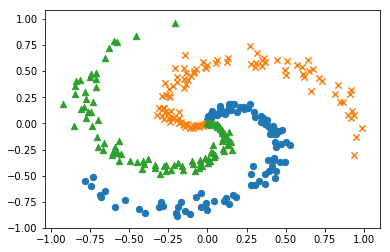

In [4]:
# 데이터점 플롯
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

### 1.4.2 신경망 구현

In [7]:
# ch01/two_layer_net.py
import sys
sys.path.append('..')
from common.np import *
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 레이어 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 1.4.3 학습용 코드

In [6]:
# ch01/train_custom_loop.py
import sys
sys.path.append('..')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm  # pip install tqdm
from common.optimizer import SGD
from dataset import spiral
from two_layer_net import TwoLayerNet

matplotlib.rc('font', family='Malgun Gothic')  # linux
# matplotlib.rc('font', family='AppleGothic')  # Mac

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2,
                    hidden_size=hidden_size,
                    output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in tqdm(range(max_epoch)):
    # 3. 데이터 셔플링
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| 에폭 {epoch+1} | 반복{iters+1}/{max_iters} | 손실 {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

 56%|█████▌    | 168/300 [00:00<00:00, 828.13it/s]

| 에폭 1 | 반복10/10 | 손실 1.13
| 에폭 2 | 반복10/10 | 손실 1.13
| 에폭 3 | 반복10/10 | 손실 1.12
| 에폭 4 | 반복10/10 | 손실 1.12
| 에폭 5 | 반복10/10 | 손실 1.11
| 에폭 6 | 반복10/10 | 손실 1.14
| 에폭 7 | 반복10/10 | 손실 1.16
| 에폭 8 | 반복10/10 | 손실 1.11
| 에폭 9 | 반복10/10 | 손실 1.12
| 에폭 10 | 반복10/10 | 손실 1.13
| 에폭 11 | 반복10/10 | 손실 1.12
| 에폭 12 | 반복10/10 | 손실 1.11
| 에폭 13 | 반복10/10 | 손실 1.09
| 에폭 14 | 반복10/10 | 손실 1.08
| 에폭 15 | 반복10/10 | 손실 1.04
| 에폭 16 | 반복10/10 | 손실 1.03
| 에폭 17 | 반복10/10 | 손실 0.96
| 에폭 18 | 반복10/10 | 손실 0.92
| 에폭 19 | 반복10/10 | 손실 0.92
| 에폭 20 | 반복10/10 | 손실 0.87
| 에폭 21 | 반복10/10 | 손실 0.85
| 에폭 22 | 반복10/10 | 손실 0.82
| 에폭 23 | 반복10/10 | 손실 0.79
| 에폭 24 | 반복10/10 | 손실 0.78
| 에폭 25 | 반복10/10 | 손실 0.82
| 에폭 26 | 반복10/10 | 손실 0.78
| 에폭 27 | 반복10/10 | 손실 0.76
| 에폭 28 | 반복10/10 | 손실 0.76
| 에폭 29 | 반복10/10 | 손실 0.78
| 에폭 30 | 반복10/10 | 손실 0.75
| 에폭 31 | 반복10/10 | 손실 0.78
| 에폭 32 | 반복10/10 | 손실 0.77
| 에폭 33 | 반복10/10 | 손실 0.77
| 에폭 34 | 반복10/10 | 손실 0.78
| 에폭 35 | 반복10/10 | 손실 0.75
| 에폭 36 | 반복10/10 | 손실 0.74
|

100%|██████████| 300/300 [00:00<00:00, 835.05it/s]

| 에폭 170 | 반복10/10 | 손실 0.19
| 에폭 171 | 반복10/10 | 손실 0.19
| 에폭 172 | 반복10/10 | 손실 0.18
| 에폭 173 | 반복10/10 | 손실 0.18
| 에폭 174 | 반복10/10 | 손실 0.18
| 에폭 175 | 반복10/10 | 손실 0.18
| 에폭 176 | 반복10/10 | 손실 0.18
| 에폭 177 | 반복10/10 | 손실 0.18
| 에폭 178 | 반복10/10 | 손실 0.18
| 에폭 179 | 반복10/10 | 손실 0.17
| 에폭 180 | 반복10/10 | 손실 0.17
| 에폭 181 | 반복10/10 | 손실 0.18
| 에폭 182 | 반복10/10 | 손실 0.17
| 에폭 183 | 반복10/10 | 손실 0.18
| 에폭 184 | 반복10/10 | 손실 0.17
| 에폭 185 | 반복10/10 | 손실 0.17
| 에폭 186 | 반복10/10 | 손실 0.18
| 에폭 187 | 반복10/10 | 손실 0.17
| 에폭 188 | 반복10/10 | 손실 0.17
| 에폭 189 | 반복10/10 | 손실 0.17
| 에폭 190 | 반복10/10 | 손실 0.17
| 에폭 191 | 반복10/10 | 손실 0.16
| 에폭 192 | 반복10/10 | 손실 0.17
| 에폭 193 | 반복10/10 | 손실 0.16
| 에폭 194 | 반복10/10 | 손실 0.16
| 에폭 195 | 반복10/10 | 손실 0.16
| 에폭 196 | 반복10/10 | 손실 0.16
| 에폭 197 | 반복10/10 | 손실 0.16
| 에폭 198 | 반복10/10 | 손실 0.15
| 에폭 199 | 반복10/10 | 손실 0.16
| 에폭 200 | 반복10/10 | 손실 0.16
| 에폭 201 | 반복10/10 | 손실 0.15
| 에폭 202 | 반복10/10 | 손실 0.16
| 에폭 203 | 반복10/10 | 손실 0.16
| 에폭 204 | 반복1

/home/excelsiorcjh/miniconda3/envs/cupy/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


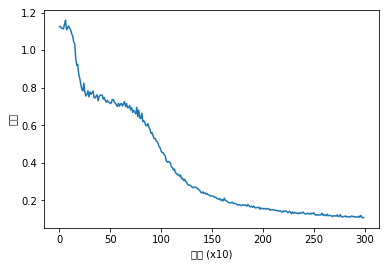

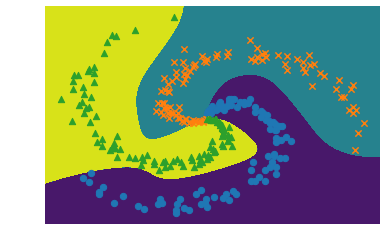

In [7]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

`np.random.permutation()`을 이용해 데이터 인덱스를 랜덤하게 셔플링할 수 있다.

In [8]:
# 데이터 셔플링
import numpy as np

np.random.permutation(10)

array([3, 5, 0, 9, 7, 6, 1, 2, 4, 8])

In [9]:
np.random.permutation(10)

array([6, 9, 5, 4, 1, 0, 8, 7, 3, 2])

### 1.4.4. Trainer 클래스

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

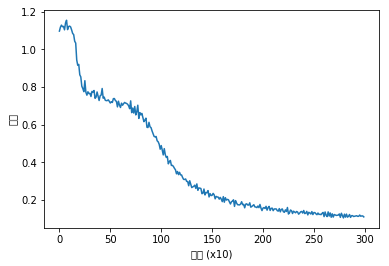

In [2]:
# ch01/train.py
%matplotlib inline
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

## 1.5 계산 고속화

### 1.5.1 비트 정밀도

`NumPy`의 부동소수점 수는 기본적으로 64비트 데이터 타입을 사용한다.

In [3]:
import numpy as np

a = np.random.randn(3)
a.dtype

dtype('float64')

`NumPy`는 64비트 부동소수점 수를 표준으로 사용하지만, 신경망의 추론과 학습은 32비트 부동소수점 수로도 문제없이 수행할 수 있다고 한다. 32비트는 64비트의 절반이므로, 메모리 관점에서는 항상 32비트 좋다. 그리고 계산 속도 측면에서도 32비트 부동소수점 수가 일반적으로 더 빠르다.

`NumPy`에서 32비트 부동소수점 수를 사용하려면 다음과 같이 데이터 타입을 `np.float32`나 `f`로 지정한다.

In [4]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [5]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

### 1.5.2 GPU(CuPy)

- `pip install cupy`

`CuPy`의 사용법은 `NumPy`와 같다.

In [7]:
import cupy as cp

x = cp.arange(6).reshape(2, 3).astype('f')
x

array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)

In [8]:
x.sum(axis=1)

array([ 3., 12.], dtype=float32)